In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Input
from sklearn.model_selection import train_test_split

In [2]:
print(tf.__version__)

2.3.0


In [3]:
os.chdir('C://Users//Andrew/Desktop/')

In [4]:
pd_dat = pd.read_csv('diagnosis.csv')

In [5]:
dataset = pd_dat.values

* Builing the train and test data splits


* Assigning training and testing inputs/outputs


* Building the model


* Creating a list containing all the inputs


* Merging all input features into a single large vector 

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [7]:
temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

In [8]:
shape_inputs = (1,)
temperature = Input(shape=shape_inputs, name='temp')
nausea_occurence = Input(shape=shape_inputs, name='nocc')
lumbar_pain = Input(shape=shape_inputs, name='lump')
urine_pushing = Input(shape=shape_inputs, name='up')
micturition_pains = Input(shape=shape_inputs, name='mict')
bis = Input(shape=shape_inputs, name='bis')

In [9]:
list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, micturition_pains, bis]

In [10]:
x = layers.concatenate(list_inputs)

* Using a logistic regression classifier for disease prediction


* Creating a list of all the outputs


* Creating the model object


* Plotting the model


* Compiling the model

In [11]:
inflamamation_pred = layers.Dense(1, activation='sigmoid', name='inflam')(x)
nephritis_pred = layers.Dense(1, activation='sigmoid', name='nephr')(x)

In [12]:
list_outputs = [inflamamation_pred, nephritis_pred]

In [13]:
model = tf.keras.Model(inputs=list_inputs, outputs=list_outputs)

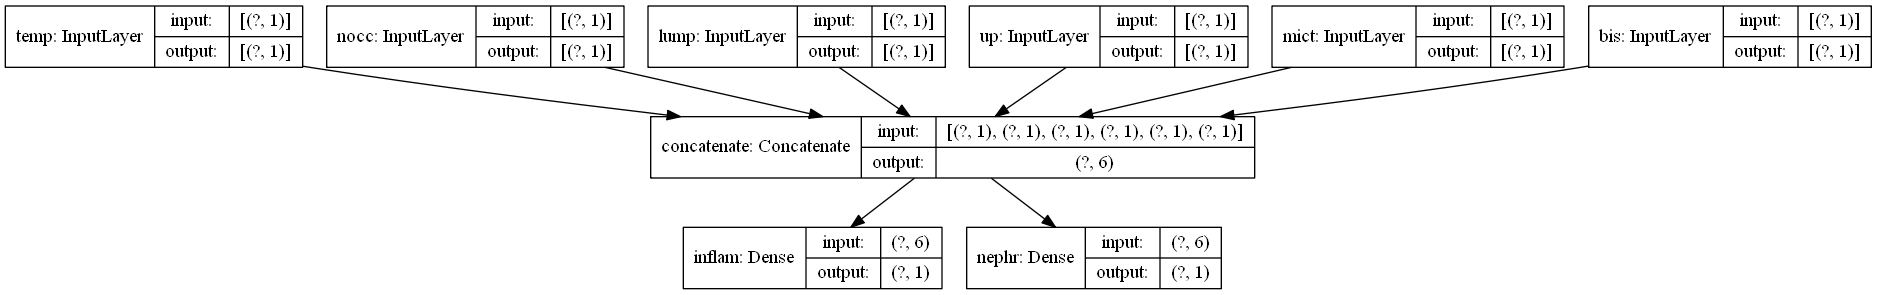

In [14]:
tf.keras.utils.plot_model(model, 'multi_input_output_model.png', show_shapes=True)

In [15]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
             loss=['binary_crossentropy','binary_crossentropy'],
             metrics={'inflam': ['acc'],
                      'nephr': ['acc']},
             loss_weights=[1., 0.2])

* Fitting & Training the model 


* Plotting the learning curves


* Evaluating the model

In [16]:
# inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lump': lumbp_train,
#                'up': up_train, 'mict': mict_train, 'bis': bis_train}

# outputs_train = {'inflam': inflam_train, 'nephr': nephr_train}

inputs_train = [temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train]
outputs_train = [inflam_train, nephr_train]

In [17]:
history = model.fit(inputs_train, outputs_train, epochs=1000, batch_size=128, verbose=False)

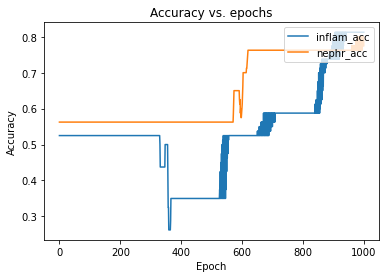

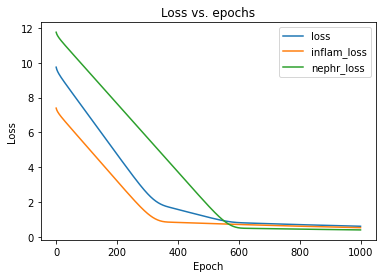

In [18]:
acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')]
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
        
    else:
        plt.figure(2)
        plt.plot(v)
        
plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()





In [19]:
model.evaluate([temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test], [inflam_test, nephr_test], verbose=2)

2/2 - 0s - loss: 0.6192 - inflam_loss: 0.5348 - nephr_loss: 0.4219 - inflam_acc: 0.8750 - nephr_acc: 0.8000


[0.6191952228546143,
 0.5348126292228699,
 0.42191281914711,
 0.875,
 0.800000011920929]